# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city = city.replace(" ", "+")
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | palana
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | bollnas
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | mar+del+plata
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | santa+vitoria+do+palmar
Processing Record 10 of Set 1 | amarwara
Processing Record 11 of Set 1 | pundaguitan
Processing Record 12 of Set 1 | port+alfred
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | talcahuano
Processing Record 15 of Set 1 | yantai
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | sredneko

Processing Record 37 of Set 4 | zhangye
Processing Record 38 of Set 4 | baruun-urt
Processing Record 39 of Set 4 | solnechnyy
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | la+palma
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | melville
Processing Record 44 of Set 4 | koslan
Processing Record 45 of Set 4 | salinopolis
Processing Record 46 of Set 4 | deputatskiy
Processing Record 47 of Set 4 | vila+velha
Processing Record 48 of Set 4 | stoholm
Processing Record 49 of Set 4 | liapades
City not found. Skipping...
Processing Record 0 of Set 5 | chuy
Processing Record 1 of Set 5 | tsiroanomandidy
Processing Record 2 of Set 5 | vanavara
Processing Record 3 of Set 5 | waingapu
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | sambava
Processing Record 7 of Set 5 | vilhena
Processing Record 8 of Set 5 | carlibaba
Processing Record 9 of Set 5 | carutapera
Processing Record 10 of Set 5 | t

Processing Record 24 of Set 8 | manuk+mangkaw
Processing Record 25 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 26 of Set 8 | trofors
Processing Record 27 of Set 8 | lozuvatka
Processing Record 28 of Set 8 | hurricane
Processing Record 29 of Set 8 | bronnoysund
Processing Record 30 of Set 8 | paamiut
Processing Record 31 of Set 8 | buraydah
Processing Record 32 of Set 8 | dingle
Processing Record 33 of Set 8 | koumac
Processing Record 34 of Set 8 | aviles
Processing Record 35 of Set 8 | huilong
Processing Record 36 of Set 8 | tautira
Processing Record 37 of Set 8 | chaihe
Processing Record 38 of Set 8 | cabo+san+lucas
Processing Record 39 of Set 8 | wamba
Processing Record 40 of Set 8 | nicoya
Processing Record 41 of Set 8 | tepalcingo
Processing Record 42 of Set 8 | port+elizabeth
Processing Record 43 of Set 8 | itarema
Processing Record 44 of Set 8 | ust-kulom
Processing Record 45 of Set 8 | formosa+do+rio+preto
Processing Record 46 of Set 8 | pisco
Processing Rec

Processing Record 11 of Set 12 | brandon
Processing Record 12 of Set 12 | bugene
Processing Record 13 of Set 12 | shingu
Processing Record 14 of Set 12 | nizwa
Processing Record 15 of Set 12 | brae
Processing Record 16 of Set 12 | iralaya
Processing Record 17 of Set 12 | viesca
Processing Record 18 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 12 | manggar
Processing Record 20 of Set 12 | semirara
Processing Record 21 of Set 12 | esperance
Processing Record 22 of Set 12 | yerofey+pavlovich
Processing Record 23 of Set 12 | nara
Processing Record 24 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 25 of Set 12 | mezen
Processing Record 26 of Set 12 | komsomolskiy
Processing Record 27 of Set 12 | moose+factory
Processing Record 28 of Set 12 | arawa
Processing Record 29 of Set 12 | poshekhonye
Processing Record 30 of Set 12 | dukat
Processing Record 31 of Set 12 | ishigaki
Processing Record 32 of Set 12 | karratha
Processing Record 33 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,5.23,55,100,0.89,US,1670283865
1,palana,59.1167,159.9667,-8.83,72,100,9.96,RU,1670283866
2,saskylakh,71.9167,114.0833,-24.31,90,100,10.01,RU,1670283866
3,bollnas,61.3482,16.3946,-5.32,85,86,2.02,SE,1670283867
4,coihaique,-45.5752,-72.0662,12.97,50,40,4.12,CL,1670283746


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.23,55,100,0.89,US,1670283865
1,palana,59.1167,159.9667,-8.83,72,100,9.96,RU,1670283866
2,saskylakh,71.9167,114.0833,-24.31,90,100,10.01,RU,1670283866
3,bollnas,61.3482,16.3946,-5.32,85,86,2.02,SE,1670283867
4,coihaique,-45.5752,-72.0662,12.97,50,40,4.12,CL,1670283746


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

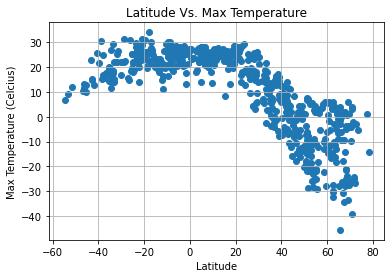

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title('Latitude Vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celcius)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

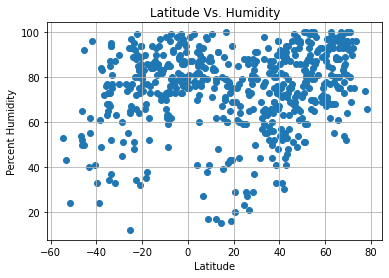

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title('Latitude Vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Percent Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

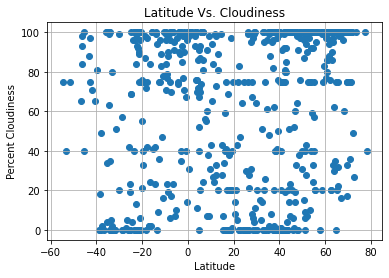

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Percent Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

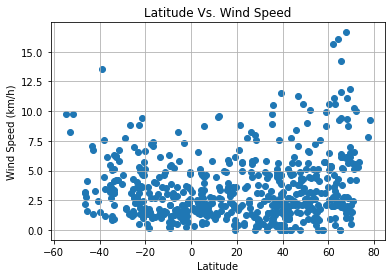

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Latitude Vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.57
The r-value is: 0.03
The r-value is: 0.02
The r-value is: 0.01


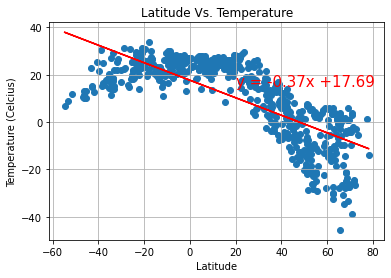

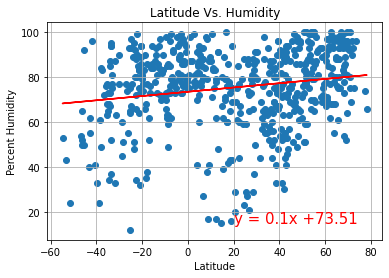

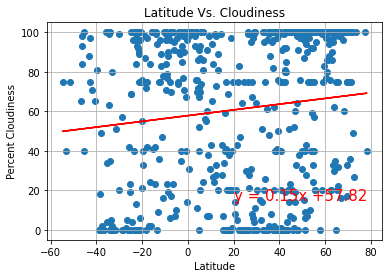

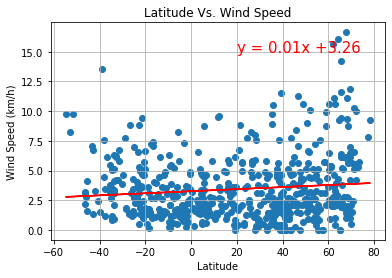

In [27]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = [city_data_df['Max Temp'], city_data_df['Humidity'],city_data_df['Cloudiness'], city_data_df['Wind Speed']]
ylabel = ['Temperature (Celcius)', 'Percent Humidity', 'Percent Cloudiness', 'Wind Speed (km/h)']
title = ['Latitude Vs. Temperature', 'Latitude Vs. Humidity', 'Latitude Vs. Cloudiness', 'Latitude Vs. Wind Speed']

for i in range(len(y_values)):
    def line_regress(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values[i])
        regress_values = x_values * slope + intercept
        
        fig, ax = plt.subplots()
        plt.scatter(x_values, y_values[i], marker='o')
        plt.plot(x_values, regress_values, "r-")
        line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
        
        plt.title(title[i])
        plt.xlabel('Latitude')
        plt.ylabel(ylabel[i])
        plt.grid(True)
        plt.annotate(line_eq,(20,15),fontsize=15,color="red")
        
        print(f"The r-value is: {rvalue**2:.2f}")
        
    line_regress(x_values, y_values)


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.23,55,100,0.89,US,1670283865
1,palana,59.1167,159.9667,-8.83,72,100,9.96,RU,1670283866
2,saskylakh,71.9167,114.0833,-24.31,90,100,10.01,RU,1670283866
3,bollnas,61.3482,16.3946,-5.32,85,86,2.02,SE,1670283867
9,amarwara,22.3000,79.1667,14.20,60,0,2.08,IN,1670283870


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,coihaique,-45.5752,-72.0662,12.97,50,40,4.12,CL,1670283746
5,mar+del+plata,-38.0023,-57.5575,24.90,84,0,7.60,AR,1670283650
6,rikitea,-23.1203,-134.9692,24.24,80,96,6.55,PF,1670283868
7,mataura,-46.1927,168.8643,10.27,50,93,2.15,NZ,1670283869
8,santa+vitoria+do+palmar,-33.5189,-53.3681,18.53,94,0,3.10,BR,1670283870


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.68


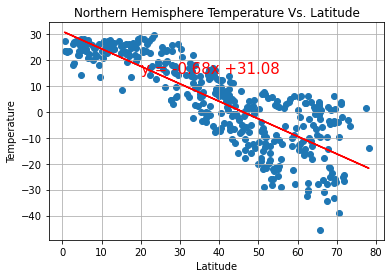

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

The r-value is: 0.27


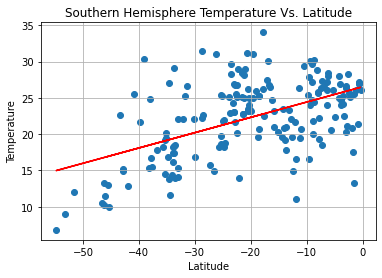

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Temperature Vs. Latitude')
plt.ylabel('Temperature')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

**Discussion about the linear relationship:**

Cities the are near the equator will experience higher temperatures than anywhere else.For the cities above the equator, you will notice that the temperatures start to drop. The opposite can be said about the cities in the southern hemisphere.  Both r values show that there is a strong positive correlation between the two.






### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06


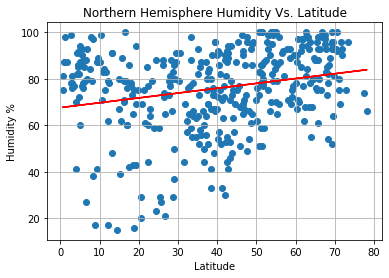

In [23]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Humidity Vs. Latitude')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

The r-value is: 0.19


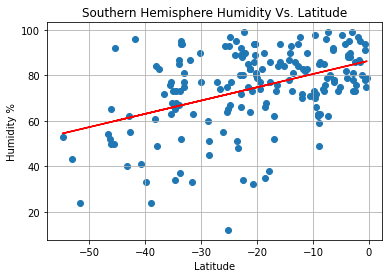

In [37]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Humidity Vs. Latitude')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

**Discussion about the linear relationship:** 

Both graphs, as well as their respected linear regression lines, show that there is not a strong relationship between the latitide of a city and the humidity percentage.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04


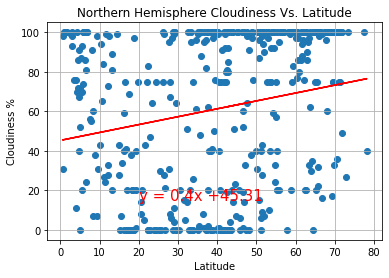

In [36]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Cloudiness Vs. Latitude')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

The r-value is: 0.05


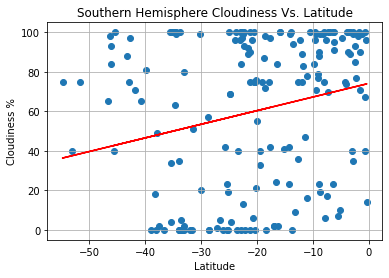

In [35]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.title('Southern Hemisphere Cloudiness Vs. Latitude')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

**Discussion about the linear relationship:** 
As indicated by the above graphs, the data is far too scattered to say that there is a direct correlation between the latitude of a city compared to the cloudiness of that city at the time. The amount of cloudiness changes day to day however the location of said city does not.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07


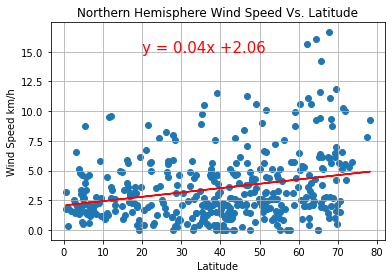

In [33]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Northern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed km/h')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

The r-value is: 0.11


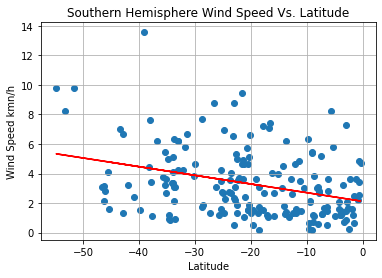

In [34]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.title('Southern Hemisphere Wind Speed Vs. Latitude')
plt.ylabel('Wind Speed kmn/h')
plt.xlabel('Latitude')

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.grid(True)

print(f"The r-value is: {rvalue**2:.2f}")

plt.show()

**Discussion about the linear relationship:** 
These graphs indicate that there is a possible correlation between the latitude and the wind speed in a given city. 
